In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Lorenz:
    def __init__(self, s=10, r=28, b=8 / 3):
        self.s = s
        self.r = r
        self.b = b

    #Differential equations of a Lorenz System
    def X(self, x, y, s):
        return s * (y - x)

    def Y(self, x, y, z, r):
        return (-x) * z + r * x - y

    def Z(self, x, y, z, b):
        return x * y - b * z

    #RK4 for the differential equations
    def RK4(self, x, y, z, s, r, b, dt):
        k_1 = self.X(x, y, s)
        l_1 = self.Y(x, y, z, r)
        m_1 = self.Z(x, y, z, b)

        k_2 = self.X((x + k_1 * dt * 0.5), (y + l_1 * dt * 0.5), s)
        l_2 = self.Y((x + k_1 * dt * 0.5), (y + l_1 * dt * 0.5), (z + m_1 * dt * 0.5), r)
        m_2 = self.Z((x + k_1 * dt * 0.5), (y + l_1 * dt * 0.5), (z + m_1 * dt * 0.5), b)

        k_3 = self.X((x + k_2 * dt * 0.5), (y + l_2 * dt * 0.5), s)
        l_3 = self.Y((x + k_2 * dt * 0.5), (y + l_2 * dt * 0.5), (z + m_2 * dt * 0.5), r)
        m_3 = self.Z((x + k_2 * dt * 0.5), (y + l_2 * dt * 0.5), (z + m_2 * dt * 0.5), b)

        k_4 = self.X((x + k_3 * dt), (y + l_3 * dt), s)
        l_4 = self.Y((x + k_3 * dt), (y + l_3 * dt), (z + m_3 * dt), r)
        m_4 = self.Z((x + k_3 * dt), (y + l_3 * dt), (z + m_3 * dt), b)

        x += (k_1 + 2 * k_2 + 2 * k_3 + k_4) * dt * (1 / 6)
        y += (l_1 + 2 * l_2 + 2 * l_3 + l_4) * dt * (1 / 6)
        z += (m_1 + 2 * m_2 + 2 * m_3 + m_4) * dt * (1 / 6)

        return (x, y, z)

    def generate(self, dt=0.1, steps=100000):
        #Initial values and Parameters
        x_0, y_0, z_0 = 1, 1, 1

        #RK4 iteration
        x_list = [x_0]
        y_list = [y_0]
        z_list = [z_0]

        i = 0

        while i < steps:
            x = x_list[i]
            y = y_list[i]
            z = z_list[i]

            position = self.RK4(x, y, z, self.s, self.r, self.b, dt)

            x_list.append(position[0])
            y_list.append(position[1])
            z_list.append(position[2])

            i += 1

        x_array = np.array(x_list)
        y_array = np.array(y_list)
        z_array = np.array(z_list)

        return x_array, y_array, z_array


def lorenz_generation(s=10, r=28, b=8 / 3):
    data, _, _ = Lorenz(s, r, b).generate()
    data = data[250:]
    data = (data - data.min()) / (data.max() - data.min())
    return data


def lorenz_visualisation(data):
    plt.figure(figsize=(20, 8))
    plt.plot(data[:1000])
    plt.xticks([i for i in range(0, 1000, 50)])
    plt.grid()
    plt.show()

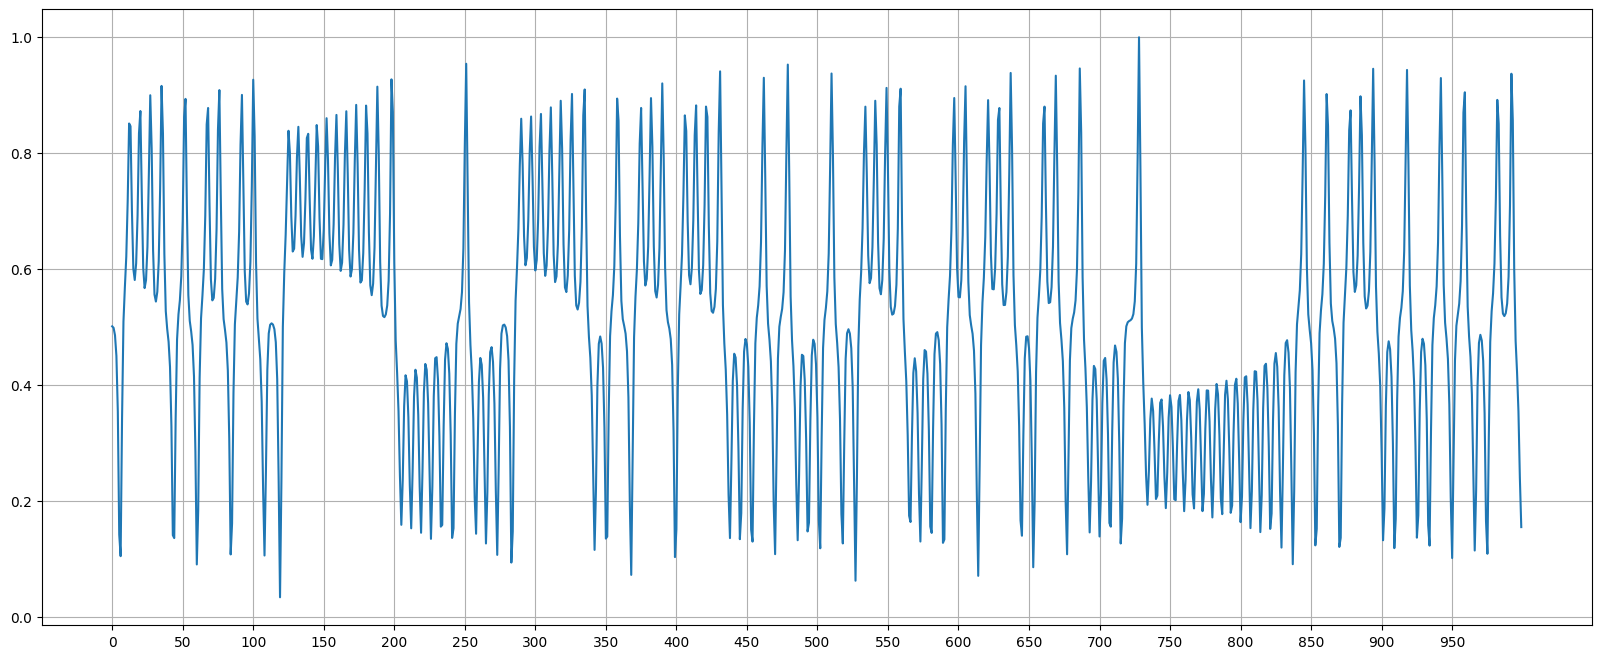

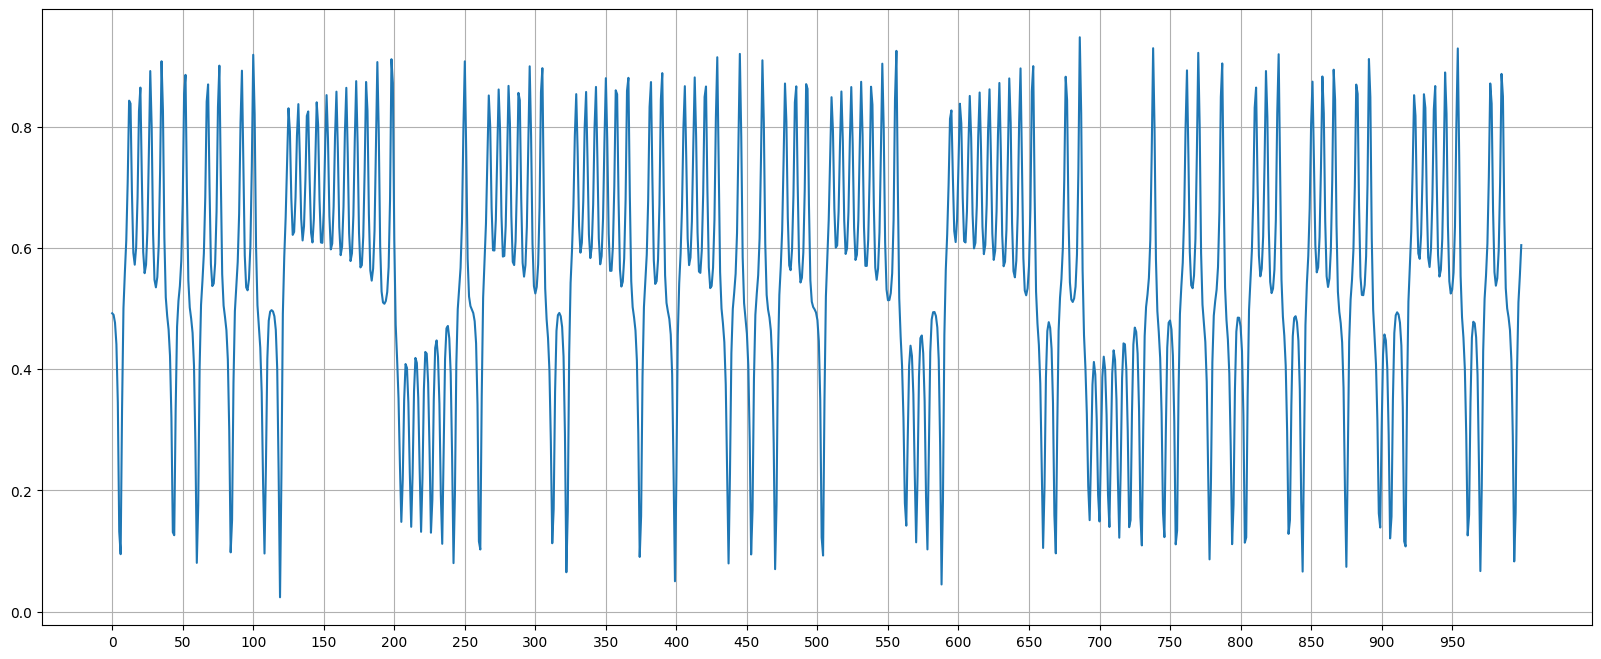

In [2]:
data = lorenz_generation(10, 28, 8 / 3)
lorenz_visualisation(data)
data = lorenz_generation(10, 28.0000000001, 8 / 3)
lorenz_visualisation(data)